In [2]:
pip install seaborn

<class 'OSError'>: Not available

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

Matplotlib is building the font cache; this may take a moment.


<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

Matplotlib is building the font cache; this may take a moment.


In [6]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 2.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [7]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [8]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [9]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
merged_data = transactions.merge(customers, on='CustomerID')

In [11]:
merged_data = merged_data.merge(products, on='ProductID')

In [12]:
print(merged_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [18]:
merged_data.rename(columns={'Price_x': 'Transaction_Price', 'Price_y': 'Product_Price'}, inplace=True)
merged_data.drop(columns=['Product_Price'], inplace=True)
merged_data.rename(columns={'Transaction_Price': 'Price'}, inplace=True)
print(merged_data[['Price', 'Quantity', 'TotalValue']].describe())

            Price     Quantity   TotalValue
count  1000.00000  1000.000000  1000.000000
mean    272.55407     2.537000   689.995560
std     140.73639     1.117981   493.144478
min      16.08000     1.000000    16.080000
25%     147.95000     2.000000   295.295000
50%     299.93000     3.000000   588.880000
75%     404.40000     4.000000  1011.660000
max     497.76000     4.000000  1991.040000


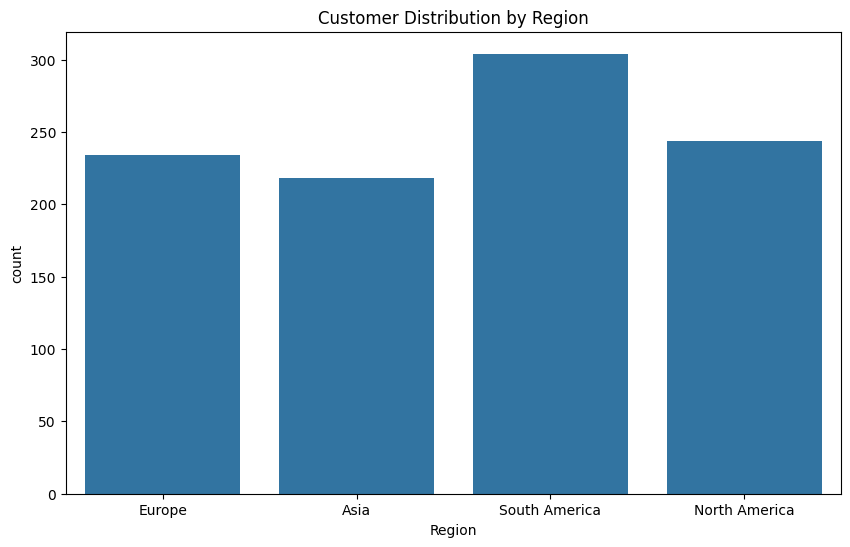

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

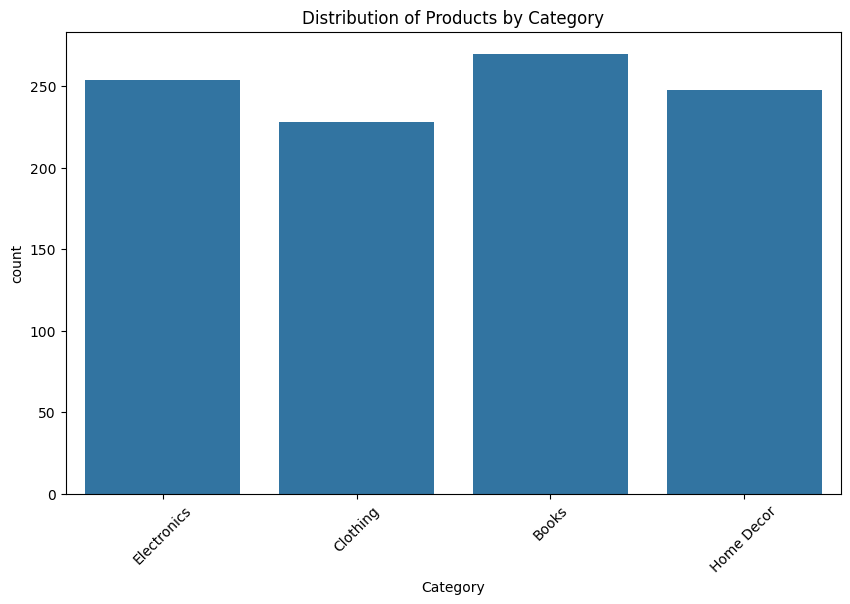

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Category')
plt.title('Distribution of Products by Category')
plt.xticks(rotation=45)
plt.show()

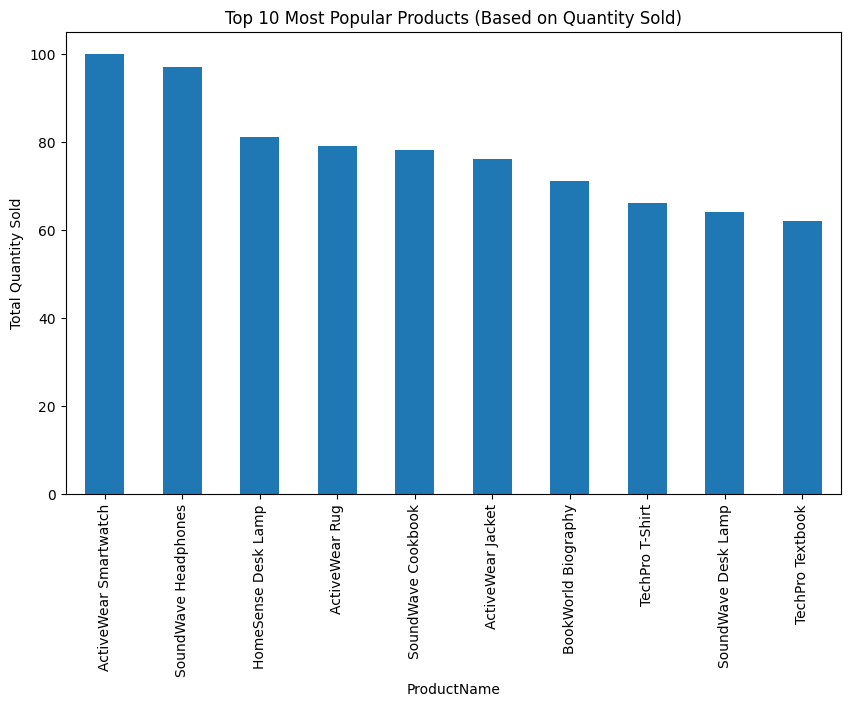

In [21]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Popular Products (Based on Quantity Sold)')
plt.ylabel('Total Quantity Sold')
plt.show()

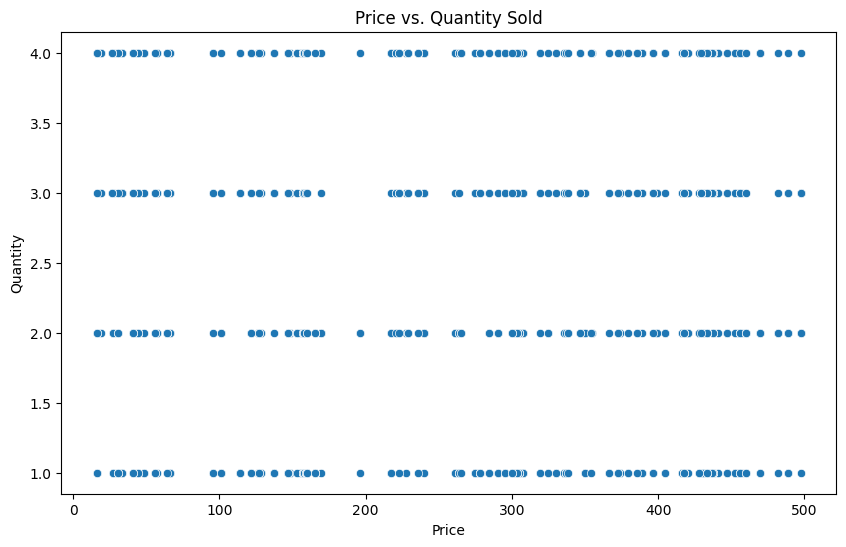

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Price', y='Quantity')
plt.title('Price vs. Quantity Sold')
plt.show()

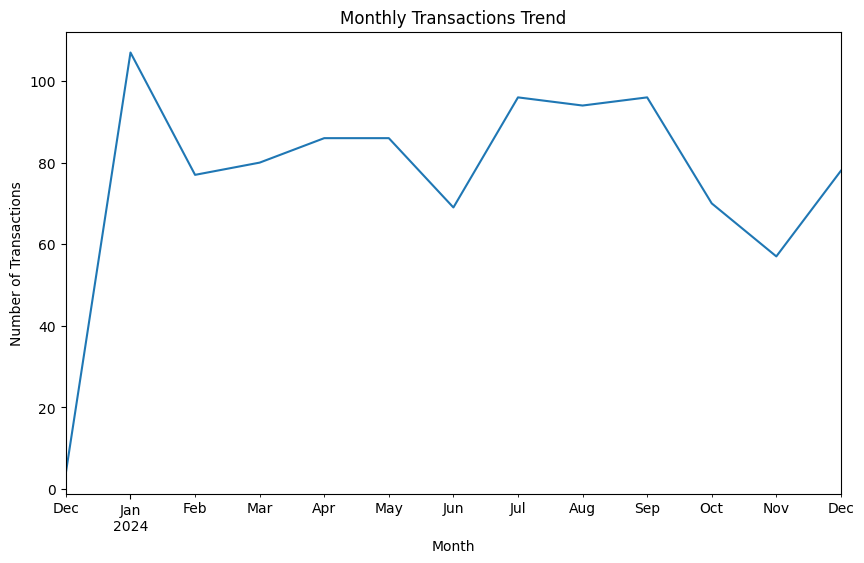

In [23]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')

# Group by month and count the number of transactions
monthly_transactions = merged_data.groupby('Month')['TransactionID'].count()

monthly_transactions.plot(kind='line', figsize=(10, 6), title='Monthly Transactions Trend')
plt.ylabel('Number of Transactions')
plt.show()